In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train size: 84 | Test size: 21

Annotations for 54.jpg:
  Class ID: 0, x_center: 0.48359375, y_center: 0.30327868852459017, width: 0.0078125, height: 0.0351288056206089

Annotations for 24.jpg:
  Class ID: 0, x_center: 0.34140625, y_center: 0.21103117505995203, width: 0.0609375, height: 0.02877697841726619
  Class ID: 0, x_center: 0.43671875, y_center: 0.20023980815347722, width: 0.0703125, height: 0.026378896882494004
  Class ID: 0, x_center: 0.496875, y_center: 0.20023980815347722, width: 0.04375, height: 0.026378896882494004
  Class ID: 0, x_center: 0.371875, y_center: 0.7673860911270983, width: 0.03125, height: 0.023980815347721823
  Class ID: 0, x_center: 0.41640625, y_center: 0.7685851318944844, width: 0.0453125, height: 0.02158273381294964
  Class ID: 0, x_center: 0.80234375, y_center: 0.47721822541966424, width: 0.0546875, height: 0.02877697841726619
  Class ID: 0, x_center: 0.71328125, y_center: 0.5983213429256595, width: 0.0390625, height: 0.08393285371702638
  Class ID: 0, x

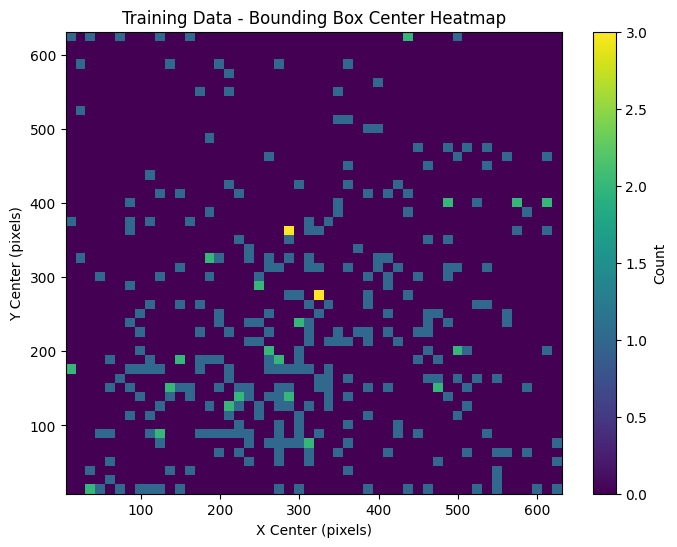

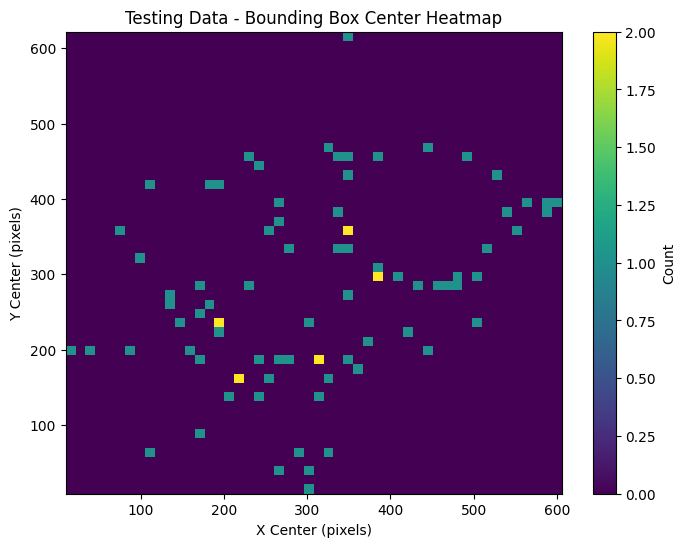

Training features shape: (332, 159)
Testing features shape: (84, 159)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,801 (112.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5545 - loss: 0.7024 - val_accuracy: 0.7619 - val_loss: 0.6563
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6780 - loss: 0.6630 - val_accuracy: 0.7619 - val_loss: 0.6212
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6762 - loss: 0.6411 - val_accuracy: 0.7619 - val_loss: 0.5891
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6724 - loss: 0.6275 - val_accuracy: 0.7619 - val_loss: 0.5581
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6784 - loss: 0.5992 - val_accuracy: 0.7619 - val_loss: 0.5337
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7017 - loss: 0.5793 - val_accuracy: 0.7619 - val_loss: 0.5175
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7050 - loss: 0.5589 - val_accuracy: 0.7738 - val_loss: 0.5086
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6698 - loss: 0.5537 - val_accuracy: 0.7738 - val_los

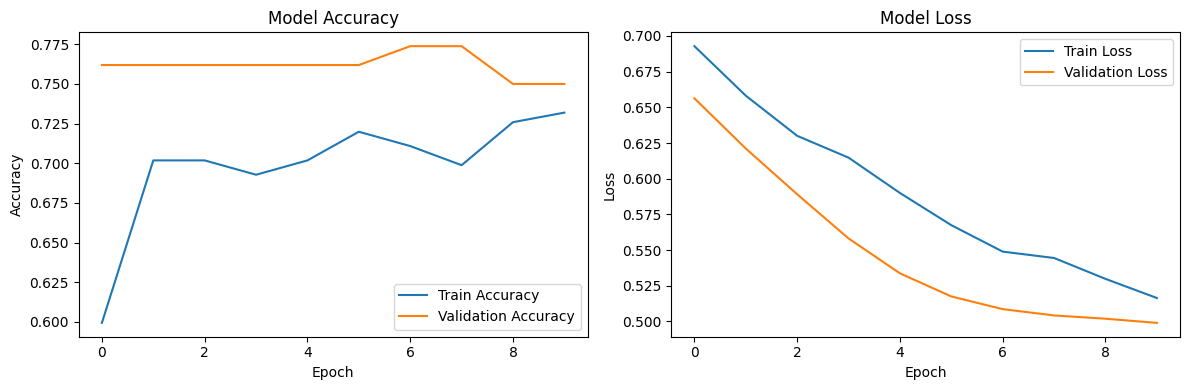

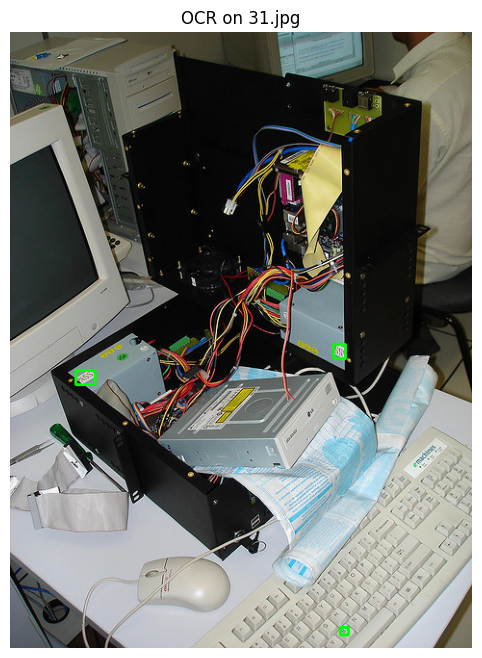

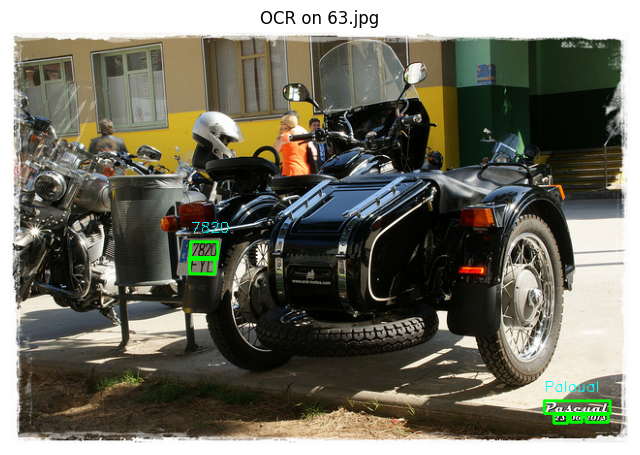

Model and preprocessing objects saved successfully.


In [4]:
# CELL 1: Project Overview (Markdown)
"""
# OCR and Text Classification Project

This notebook processes a dataset of images with YOLO-format annotations, extracts text using EasyOCR, translates it to Arabic, and trains a neural network to classify the sentiment of the extracted text (positive/negative). It also prints the annotations for each image.

**Dataset**: Sourced from Kaggle, containing images (.jpg, .png) and YOLO annotation files (.txt) with normalized bounding boxes.

**Goals**:
- Extract text from image regions specified by bounding boxes.
- Translate extracted text to Arabic.
- Classify text sentiment using a neural network.
- Print annotations for each image.
- Visualize results and evaluate model performance.
"""

# CELL 2: Install and Imports
# Install dependencies
!pip install easyocr googletrans==4.0.0-rc1 tensorflow scikit-learn

# Imports
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import easyocr
from googletrans import Translator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# CELL 3: Setup and Data Loading
# Paths and setup
DATA_DIR = '/content/drive/MyDrive/images'  # Adjust to your dataset path
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png']

# OCR and translation setup
reader = easyocr.Reader(['en'])  # Add 'ar' for Arabic if needed
translator = Translator()

# List images and annotation files
def list_files_by_extension(folder, extensions):
    files = []
    for ext in extensions:
        files.extend(glob.glob(os.path.join(folder, f'*{ext}')))
    return sorted(files)

image_files = list_files_by_extension(DATA_DIR, IMAGE_EXTENSIONS)
annotation_files = list_files_by_extension(DATA_DIR, ['.txt'])

# Match images with annotations
image_annotation_pairs = []
for img_path in image_files:
    base = os.path.splitext(os.path.basename(img_path))[0]
    ann_path = os.path.join(DATA_DIR, f'{base}.txt')
    if os.path.exists(ann_path):
        image_annotation_pairs.append((img_path, ann_path))

# Split into train/test
train_pairs, test_pairs = train_test_split(image_annotation_pairs, test_size=0.2, random_state=42)
print(f"Train size: {len(train_pairs)} | Test size: {len(test_pairs)}")

# CELL 4: OCR and Feature Extraction
# Function to extract OCR, compute bounding box features, and print annotations
def extract_ocr_and_features(pairs):
    all_data = []
    for img_path, ann_path in pairs:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        h, w, _ = img.shape
        with open(ann_path, 'r') as f:
            lines = f.readlines()

        # Print annotations for this image
        print(f"\nAnnotations for {os.path.basename(img_path)}:")
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"  Invalid annotation: {line.strip()}")
                continue
            class_id, x_center, y_center, box_width, box_height = parts
            print(f"  Class ID: {class_id}, x_center: {x_center}, y_center: {y_center}, width: {box_width}, height: {box_height}")

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, x_center, y_center, box_width, box_height = map(float, parts)
            x = int((x_center - box_width / 2) * w)
            y = int((y_center - box_height / 2) * h)
            bw = int(box_width * w)
            bh = int(box_height * h)
            roi = img[y:y+bh, x:x+bw]

            # OCR extraction
            result = reader.readtext(roi)
            text = ' '.join([t[1] for t in result]).strip()
            translated = translator.translate(text, dest='ar').text if text else ''

            # Compute bounding box features
            area = box_width * box_height
            aspect_ratio = box_width / box_height if box_height > 0 else 0

            # Simulate sentiment label (replace with actual labels if available)
            sentiment = 'positive' if len(text) % 2 == 0 else 'negative'  # Placeholder

            all_data.append({
                'image': os.path.basename(img_path),
                'text': text,
                'translated': translated,
                'box': [x, y, bw, bh],
                'area': area,
                'aspect_ratio': aspect_ratio,
                'sentiment': sentiment
            })
    return all_data

# Process training and testing data
train_data = extract_ocr_and_features(train_pairs)
test_data = extract_ocr_and_features(test_pairs)

# Save to CSV
pd.DataFrame(train_data).to_csv('/content/drive/MyDrive/images/train.txt', index=False)
pd.DataFrame(test_data).to_csv('/content/drive/MyDrive/images/val.txt', index=False)

# Display data summary
print(f"\nTotal annotations: {len(train_data) + len(test_data)}")
print(pd.DataFrame(train_data).head())

# CELL 5: Data Validation
# Data validation
def validate_data(data):
    df = pd.DataFrame(data)
    print("Missing text entries:", df['text'].isna().sum())
    print("Invalid bounding boxes:", df['box'].apply(lambda x: any(v < 0 for v in x)).sum())
    print("Area statistics:")
    print(df['area'].describe())
    print("Aspect ratio statistics:")
    print(df['aspect_ratio'].describe())

print("Training data validation:")
validate_data(train_data)
print("\nTesting data validation:")
validate_data(test_data)

# CELL 6: Visualize Bounding Box Distribution
# Visualize bounding box distribution
def plot_bbox_heatmap(data, title):
    x_centers = [(d['box'][0] + d['box'][2] / 2) for d in data]
    y_centers = [(d['box'][1] + d['box'][3] / 2) for d in data]
    plt.figure(figsize=(8, 6))
    plt.hist2d(x_centers, y_centers, bins=50, cmap='viridis')
    plt.colorbar(label='Count')
    plt.title(f'{title} - Bounding Box Center Heatmap')
    plt.xlabel('X Center (pixels)')
    plt.ylabel('Y Center (pixels)')
    plt.show()

plot_bbox_heatmap(train_data, 'Training Data')
plot_bbox_heatmap(test_data, 'Testing Data')

# CELL 7: Prepare Data for Classification
# Prepare data for text classification
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_text = vectorizer.fit_transform([d['text'] for d in train_data]).toarray()
X_test_text = vectorizer.transform([d['text'] for d in test_data]).toarray()

# Encode sentiment labels
le = LabelEncoder()
y_train = le.fit_transform([d['sentiment'] for d in train_data])
y_test = le.transform([d['sentiment'] for d in test_data])

# Combine text features with bounding box features
X_train_bbox = np.array([[d['area'], d['aspect_ratio']] for d in train_data])
X_test_bbox = np.array([[d['area'], d['aspect_ratio']] for d in test_data])

# Normalize bounding box features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_bbox = scaler.fit_transform(X_train_bbox)
X_test_bbox = scaler.transform(X_test_bbox)

# Concatenate features
X_train = np.hstack([X_train_text, X_train_bbox])
X_test = np.hstack([X_test_text, X_test_bbox])

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# CELL 8: Build and Train Model
# Build and train neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# CELL 9: Evaluate Model
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# CELL 10: Visualize OCR Results
# Visualize OCR results on test samples
for i in range(min(2, len(test_pairs))):
    img_path, ann_path = test_pairs[i]
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    with open(ann_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        _, x_center, y_center, box_width, box_height = map(float, parts)
        x = int((x_center - box_width / 2) * w)
        y = int((y_center - box_height / 2) * h)
        bw = int(box_width * w)
        bh = int(box_height * h)
        roi = img[y:y+bh, x:x+bw]

        result = reader.readtext(roi)
        text = ' '.join([t[1] for t in result]).strip()
        translated = translator.translate(text, dest='ar').text if text else ''

        # Draw bounding box and text
        cv2.rectangle(img, (x, y), (x + bw, y + bh), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    # Show image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR on {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()

# CELL 11: Save Model
# Save the model
model.save('/content/sentiment_classifier.h5')

# Save vectorizer and scaler for inference
import joblib
joblib.dump(vectorizer, '/content/tfidf_vectorizer.pkl')
joblib.dump(scaler, '/content/scaler.pkl')
joblib.dump(le, '/content/label_encoder.pkl')

print("Model and preprocessing objects saved successfully.")